## Ley de los tres sigmas

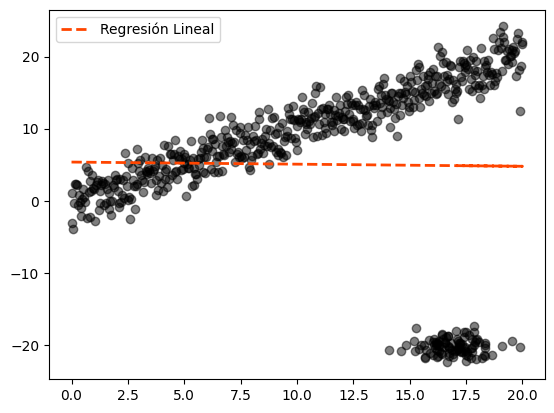

In [37]:
import numpy as np
import matplotlib.pyplot as  plt

x = np.linspace(0,20,500)
y = x + np.random.normal(0,2,500)
xr = np.random.normal(17,1,100)
yr = np.random.normal(-20,1,100)

xt = np.concatenate((x,xr))
yt = np.concatenate((y,yr))

coeff = np.polyfit(xt,yt,1)
yl = coeff[0]*xt + coeff[1]

fig, ax = plt.subplots()
ax.plot(xt,yt,'ko',alpha=0.5)
ax.plot(xt,yl,color="orangered",lw=2,ls="--",label="Regresión Lineal")
ax.legend()

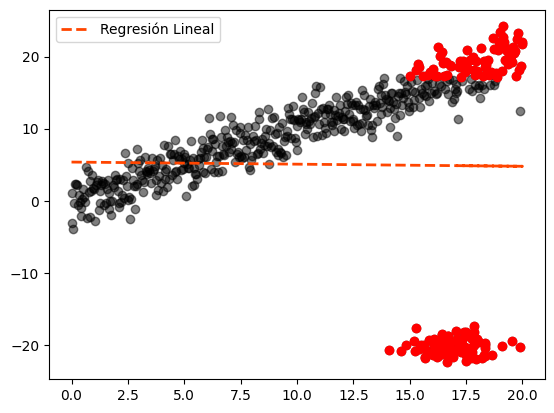

In [38]:
d = np.sqrt(np.square(yt - yl))

criterio = d > 1.5*np.std(d)
yf = yt[criterio]
xf = xt[criterio]

fig, ax = plt.subplots()
ax.plot(xt,yt,'ko',alpha=0.5)
ax.plot(xf,yf,'ro')
ax.plot(xt,yl,color="orangered",lw=2,ls="--",label="Regresión Lineal")
ax.legend()

### Aplicar la mejora
#### Peinar los datos - Outlier at the BarberShop

90


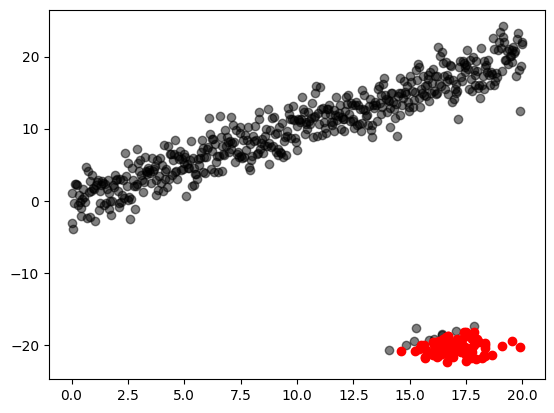

In [40]:
def rLineal (x,y):
    coeff = np.polyfit(x,y,1)
    return coeff[0]*x + coeff[1]

def peinado(x,y,porc):
    n = int(y.size*(porc/100))
    print(n)
    outliers = np.zeros((n,2))
    for i in range(n):
        yl = rLineal(x,y)
        d = np.sqrt(np.square(y - yl))
        dmax_idx = np.argmax(d)
        outliers[i,1] = y[dmax_idx]
        outliers[i,0] = x[dmax_idx]

        y = np.delete(y,dmax_idx)
        x = np.delete(x,dmax_idx)

    return x,y,outliers

x, y, outliers = peinado(xt,yt,15)

fig, ax = plt.subplots()
ax.plot(x,y,'ko',alpha=0.5)
ax.plot(outliers[:,0],outliers[:,1],'ro')